In [ ]:
import numpy as np

In [ ]:
def fn_cubed(X):
  return (X**3).sum(axis=0)
def fn_cubed_grad(X):
  return 3*X**2

In [ ]:
def explain_metrix(f, xs, Is, lam):
  """
  f : (K x 1) --> scalar
  xs : length-(N+1) list of (K x 1) vectors
  Is : length-M list of (K x 1) vectors
  lam : scalar
  """
  N = len(xs) - 1
  K = xs[0].shape[0]
  int_II = np.array([I @ I.T for I in Is]).mean(axis=0)
  ints_Idf = []
  for x in xs:
    ints_Idf.append(np.array([I * (f(x) - f(x-I)) for I in Is]).mean(axis=0))
  first_mat = np.linalg.inv(lam * N * np.identity(K) + int_II)
  phis = np.array([np.zeros((K,1))] * (N+1))
  while True:
    phis_prev = phis.copy()
    for n in range(N+1):
      phis_sum = phis.sum(axis=0)
      second_mat = lam * (phis_sum - phis[n]) + ints_Idf[n]
      phis[n] = first_mat @ second_mat
    if np.abs(phis - phis_prev).max() < 1e-6:
      break
  return phis

In [ ]:
def explain_yeh(f, xs, Is, lam):
  """
  f : (K x 1) --> scalar
  x : (K x 1) vector
  Is : length-M list of (K x 1) vectors
  lam : scalar
  """
  N = len(xs) - 1
  K = xs[0].shape[0]
  int_II = np.array([I @ I.T for I in Is]).mean(axis=0)
  int_II_inv = np.linalg.inv(int_II)
  phis = []
  for x in xs:
    int_Idf = np.array([I * (f(x) - f(x-I)) for I in Is]).mean(axis=0)
    phis.append(int_II_inv @ int_Idf)
  return phis

In [ ]:
np.random.seed(0)

N = 100
M = 1000
K = 3
lam = 2/N

x = np.array([[2], [1], [3]])
xs = [x]
for _ in range(N):
  xs.append(x + np.random.normal(size=(K,1)))

Is = []
for _ in range(M):
  Is.append(np.random.normal(size=(K,1)))

print(explain_metrix(fn_cubed, xs, Is, lam))
print(explain_yeh(fn_cubed, x, Is, lam))

[[[18.30901241]
  [ 9.38954817]
  [31.36993849]]

 [[27.62482903]
  [10.41690096]
  [37.92049713]]

 [[31.23051854]
  [16.64154339]
  [26.47445547]]

 [[22.6285278 ]
  [ 9.09509614]
  [30.73705401]]

 [[19.90741876]
  [ 9.7962205 ]
  [41.88598724]]

 [[21.63118371]
  [ 9.68088841]
  [34.12511694]]

 [[19.70174131]
  [14.68557265]
  [30.22397377]]

 [[19.48467177]
  [ 8.24676393]
  [22.69391838]]

 [[21.15907461]
  [11.87797676]
  [27.54965102]]

 [[31.28130034]
  [ 8.48586956]
  [31.49696621]]

 [[17.63212909]
  [14.9784413 ]
  [42.05668753]]

 [[18.93538207]
  [10.26585886]
  [26.93881985]]

 [[14.57167145]
  [ 8.75182293]
  [32.29972146]]

 [[24.28168427]
  [13.28444457]
  [29.21292137]]

 [[17.22950876]
  [ 8.25694382]
  [25.00879062]]

 [[14.75960419]
  [17.13987643]
  [28.67770301]]

 [[16.7599592 ]
  [ 8.41984059]
  [36.49569903]]

 [[14.74704455]
  [ 8.9141964 ]
  [26.910551  ]]

 [[19.85839445]
  [ 8.54140713]
  [25.79281639]]

 [[18.22401611]
  [10.45772636]
  [31.76849665]]



In [ ]:
fn_cubed_grad(x)

array([[12],
       [ 3],
       [27]])

In [ ]:
def visualize_infidelity(f, xs, Is, explanations):
  infidelities = []
  for x in xs:
    f_x = f(x)
    for I in Is:
      actual_change = f_x - f(x - I)
      predicted_change = I.T @ explanations  # Use the single explanation vector
      infidelity = (predicted_change - actual_change)**2
      infidelities.append(infidelity[0, 0])  # Take scalar value from 1x1 array

  # Plotting the infidelity distribution
  plt.figure(figsize=(10, 6))
  plt.hist(infidelities, bins=30, color="skyblue", edgecolor="black")
  plt.title("Infidelity of Explanation")
  plt.xlabel("Infidelity (Squared Error)")
  plt.ylabel("Frequency")
  plt.show()

  # Print average infidelity as a summary metric
  avg_infidelity = np.mean(infidelities)
  print(f"Average Infidelity: {avg_infidelity}")

In [ ]:
def infidelity(f, x, phi, Is):
  a = [(I.T @ phi - (f(x) - f(x-I)))**2 for I in Is]
  return np.array(a).mean()

def sensitivity(phis):
  phi0 = phis[0]
  return max(((phi-phi0)**2).sum() for phi in phis[1:])

# infidelity(f, x, phis[0], Is)
# sensitivity(phis)

In [ ]:
points = [ f"p{i}" for i in range(5) ]

def run_explantions(x):
  np.random.seed(0)

  N = 100
  M = 1000
  K = 3
  lam = 2/N

  xs = [x]
  for _ in range(N):
    xs.append(x + np.random.normal(size=(K,1)))

  Is = []
  for _ in range(M):
    Is.append(np.random.normal(size=(K,1)))

  return (explain_metrix(fn_cubed, xs, Is, lam),
          explain_yeh(fn_cubed, xs, Is, lam),
          Is)


def run_5_times():
  xes = [np.array([[2], [1], [3]]),
         np.array([[3], [5], [7]]),
         np.array([[9], [11], [12]]),
         np.array([[11], [14], [21]]),
         np.array([[19], [42], [21]])]

  ours_results = []
  yehs_results = []
  ours_results_infidelity = []
  yehs_results_infidelity = []
  ours_results_sensitivity = []
  yehs_results_sensitivity = []

  for i in range(5):
    ours, yehs, cur_Is = run_explantions(xes[i])
    ours_results.append(ours)
    yehs_results.append(yehs)

    cur_ours_inf = infidelity(fn_cubed, xes[i], ours[0], cur_Is)
    cur_yehs_inf = infidelity(fn_cubed, xes[i], yehs[0], cur_Is)
    cur_ours_sens = sensitivity(ours)
    cur_yehs_sens = sensitivity(yehs)

    ours_results_infidelity.append(cur_ours_inf)
    yehs_results_infidelity.append(cur_yehs_inf)
    ours_results_sensitivity.append(cur_ours_sens)
    yehs_results_sensitivity.append(cur_yehs_sens)

  return (ours_results_infidelity, yehs_results_infidelity,
          ours_results_sensitivity, yehs_results_sensitivity)

# ours_results, yehs_results = run_5_times()
results = run_5_times()

sensitivity phis: 
[[[18.30901241]
  [ 9.38954817]
  [31.36993849]]

 [[27.62482903]
  [10.41690096]
  [37.92049713]]

 [[31.23051854]
  [16.64154339]
  [26.47445547]]

 [[22.6285278 ]
  [ 9.09509614]
  [30.73705401]]

 [[19.90741876]
  [ 9.7962205 ]
  [41.88598724]]

 [[21.63118371]
  [ 9.68088841]
  [34.12511694]]

 [[19.70174131]
  [14.68557265]
  [30.22397377]]

 [[19.48467177]
  [ 8.24676393]
  [22.69391838]]

 [[21.15907461]
  [11.87797676]
  [27.54965102]]

 [[31.28130034]
  [ 8.48586956]
  [31.49696621]]

 [[17.63212909]
  [14.9784413 ]
  [42.05668753]]

 [[18.93538207]
  [10.26585886]
  [26.93881985]]

 [[14.57167145]
  [ 8.75182293]
  [32.29972146]]

 [[24.28168427]
  [13.28444457]
  [29.21292137]]

 [[17.22950876]
  [ 8.25694382]
  [25.00879062]]

 [[14.75960419]
  [17.13987643]
  [28.67770301]]

 [[16.7599592 ]
  [ 8.41984059]
  [36.49569903]]

 [[14.74704455]
  [ 8.9141964 ]
  [26.910551  ]]

 [[19.85839445]
  [ 8.54140713]
  [25.79281639]]

 [[18.22401611]
  [10.45772636]

In [ ]:
# print(len(yehs_results[0]))
# print(len(ours_results[0]))

101
101


In [ ]:
for res in results:
  print(res)

[532.1660867866068, 3304.622494756785, 14230.14095405391, 30214.634478538937, 103094.16751542548]
[518.280199280078, 3275.2742973322866, 14139.570585213696, 30041.726525995546, 102546.38467741001]
[337.8332108601863, 1305.6640940227471, 5237.15308068297, 11696.579991754064, 57499.27738347719]
[3495.6645507713047, 12871.967359034063, 49488.68383852964, 111637.35084712566, 525702.0002105318]


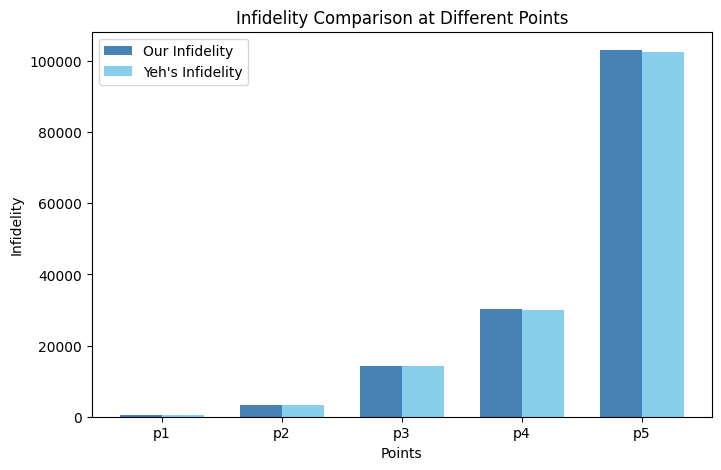

<Figure size 640x480 with 0 Axes>

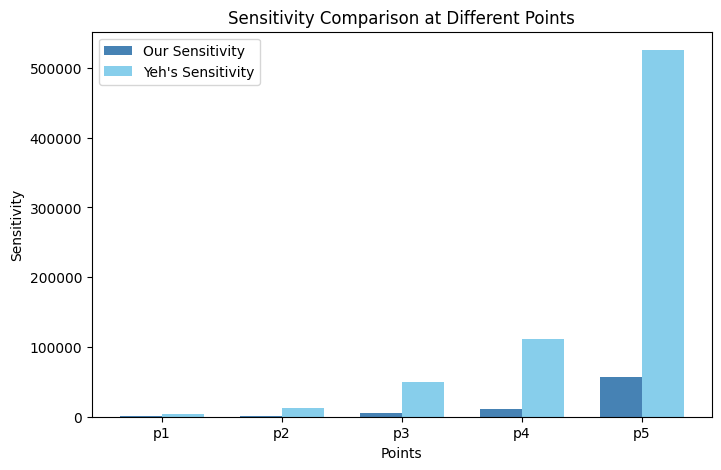

<Figure size 640x480 with 0 Axes>

In [ ]:
def visualize(metric="Infidelity", ours=results[0], yehs=results[1]):
  # Points for the x-axis
  points = ['p1', 'p2', 'p3', 'p4', 'p5']

  x = range(len(points))
  width = 0.35

  fig, ax = plt.subplots(figsize=(8, 5))
  bars1 = ax.bar(x, ours, width, label=f'Our {metric}', color="steelblue")
  bars2 = ax.bar([p + width for p in x], yehs, width, label=f"Yeh's {metric}", color="skyblue")

  # Add labels, title, and custom x-axis tick labels
  ax.set_xlabel('Points')
  ax.set_ylabel(f'{metric}')
  ax.set_title(f'{metric} Comparison at Different Points')
  ax.set_xticks([p + width / 2 for p in x])
  ax.set_xticklabels(points)
  ax.legend()

  plt.show()
  plt.savefig(f"{metric}_comparison_chart.png", dpi=300, bbox_inches="tight")
  plt.close(fig)

visualize("Infidelity", results[0], results[1])
visualize("Sensitivity", results[2], results[3])